# 任务1 OpenCV实现图像的读取与保存

## 职业能力目标

- Linux下查看USB摄像头设备；
- 使用opencv-python库完成图像的采集、显示和保存。

## 任务描述

本实验将实现使用USB摄像头完成图像采集、图像显示以及图像保存。

## 任务要求

- 使用VideoCapture方法实例化摄像头对象
- 使用set方法设置采集图像的像素
- 使用namedWindow方法构建图像窗口
- 使用read方法读取图像
- 使用imshow方法展示图像
- 使用imwrite方法保存图像

## 任务实施

## 1. Linux下查看USB摄像头设备
想要从USB摄像头获取图片，然后在opencv中进行处理。

在用opencv编写获取USB摄像头图片的代码之前，最好先在Ubuntu下查看一下USB摄像头的列表与对应的编号。


### 1.1 查看video设备

在linux中任何对象都是文件，查看当前是否有摄像头挂载到Ubuntu上，可以执行下面的命令行
```
!ls -ltrh /dev/video*
```
ls参数：
- -l： 列出文件的详细信息。
- -t： 以时间排序。
- -r： 对目录反向排序。
- -h： 显示出了文件的大小

`/dev/video*`：表示`/dev/`目录下所有以`video`为开头的文件

<font color=red size=3>动手练习1</font>

在`<1>`处，使用`ls`命令设置查看参数为`ltrh`，查看`/dev`目录下的所有`video`设备。

**填写完成后执行代码，输出结果类似为`crw-rw---- 1 root video 81, 0 6月  18 18:25 /dev/video0`，说明填写正确。**

In [ ]:
!<1>

`/dev/video0`表示有一个摄像头挂载在开发板上，编号为`0`

**知识补充**

crw 其中：
- c：表示字符设备文件
- r：表示可读权限
- w：表示可写权限

<details>
<summary><font color=red size=3>点击查看动手练习1答案</font></summary>
<pre><code>

```bash
!ls -ltrh /dev/video*
```
</code></pre>
</details>

## 2. 图像的读取与显示

已经查看到摄像头信息，接下来使用opencv从USB摄像头读取图像，并在开发板中显示出来。

 

### 2.1 导入cv2

`python-opencv` 在python中的包名称叫做 cv2
- `cv2`实现图像处理和计算机视觉方面的很多通用算法。

**填写完成后执行代码，输出结果为opencv的版本版本号，说明填写正确。**

In [ ]:
import cv2

<font color=red size=3>动手练习2</font>

在`<1>`处，请用`cv2.__version__`来查看opencv的版本

In [ ]:
<1>

填写完成后执行代码，输出结果为opencv的版本版本号，说明填写正确。

<details>
<summary><font color=red size=3>点击查看动手练习2答案</font></summary>
<pre><code>

```python
cv2.__version__
```
</code></pre>
</details>

### 2.2 创建一个video capture的实例

opencv读取usb摄像头的图像， 需要用到`VideoCapture`类, 此文章提供了VideoCapture的基础操作。如果你在操作过程中，摄像头读取失败， 我们还为你提供了问题[排查手册](./摄像头排查手册.txt)。

创建VideoCapture 对象的时候，我们需要传入一个合适的摄像头编号。

`cv2.VideoCapture(0)`

参数说明:

- VideCapture接受的参数为序号
- 0 : 默认为开发板上的摄像头(如果有的话) / USB摄像头 webcam
- 1 : USB摄像头2
- 2 ：USB摄像头3 以此类推
- -1：代表最新插入的USB设备

- `cap = cv2.VideoCapture(0)`实例化一个对象赋值给`cap`
- `time.sleep(2)`设置睡眠2秒，为了给摄像头有打开的时间

<font color=red size=3>动手练习3</font>

在`<1>`处，请用`cv2.VideoCapture`来读取编号为`0`的摄像头。

**填写完成后执行以下代码，输出结果类似为`<VideoCapture 0x7f73a0ead0>`的`VideoCapture`实例对象地址，说明填写正确。**

In [ ]:
cap = <1>
cap

<details>
<summary><font color=red size=3>点击查看动手练习3答案</font></summary>
<pre><code>

```python
cap = cv2.VideoCapture(0)
cap
```
</code></pre>
</details>

### 2.3 查看Video Capture是否已经打开

实例化`VideoCapture`对象后，摄像头会自动打开

使用`cap.isOpened()`方法查看摄像头状态

若摄像头已打开则返回`True`，否则返回`False`


In [ ]:
print("摄像头是否已经打开 ？ {}".format(cap.isOpened()))

### 2.4 设置显示画面

接下来利用`cap.set`方法对窗口像素进行设置

` cap.set(propId, value)`

参数说明：

- `propId`表示VideoCaptureProperties中的属性标识符，
  - `cv2.CAP_PROP_FRAME_WIDTH`表示设置摄像头采集画面宽的像素大小
  - `cv2.CAP_PROP_FRAME_HEIGHT`表示设置摄像头采集画面高的像素大小
- `value`表示属性标识符的值，下面代码中，把采集画面像素宽度设置为1920，高度设置为1080

In [ ]:
# 画面宽度设定为 1920
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)

# 画面高度度设定为 1080
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

### 2.5 创建显示窗口

`cv2.namedWindow(winname, flags)`：构建视频的窗口，用于放置图片

参数说明：
- `winname`：表示窗口的名字,可用作窗口标识符的窗口名称。
- `flags`：用于设置窗口的属性，常用属性如下
  - `WINDOW_NORMAL`：可以调整大小窗口
  - `WINDOW_KEEPRATIO`：保持图像比例
  - `WINDOW_GUI_EXPANDED`：绘制一个新的增强GUI窗口

创建一个名为`image_win`的窗口，设置窗口属性为可调整大小，保持图像比例，绘制窗口

In [ ]:
cv2.namedWindow('image_win', flags=cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO | cv2.WINDOW_GUI_EXPANDED)
cv2.setWindowProperty('image_win', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN) # 全屏展示

### 2.6 读取图像

使用`cap.read()` 获取一帧图片，`cap.read()`返回值有两个，分别赋值给`ret`，`frame`
- `ret`：若画面读取成功，则返回True，反之返回False
- `frame`：是读取到的图片对象(numpy的ndarray格式)

<font color=red size=3>动手练习4</font>

在`<1>`处，请用`cap.read()`来读取图像，赋值给`ret`，`frame`两个参数。

**填写完成后执行以下代码，`ret`输出结果为`True`，说明填写正确。**

In [ ]:
ret, frame = <1>
print(ret)
print(frame)

<details>
<summary><font color=red size=3>点击查看动手练习4答案</font></summary>
<pre><code>

```python
ret, frame = cap.read()
print(ret)
print(frame)
```
</code></pre>
</details>

### 2.7 显示图片

- `cv2.imshow(winname, mat)`函数可以在窗口中显示图像。  
  参数说明：
  - `winname`：窗口名称（也就是我们对话框的名称），它是一个字符串类型。
  - `mat`：是一帧的画面图像。可以创建任意数量的窗口，但必须使用不同的窗口名称。


- `cv2.waitKey`：`waitkey`控制着`imshow`的持续时间
  - 当`imshow`之后不跟`waitkey`时，相当于没有给`imshow`提供时间展示图像，只会有一个空窗口一闪而过。
  - `cv2.waitKey(100)`表示窗口中显示图像时间为100毫秒
  - `cv2.imshow`之后一定要跟`cv2.waitKey`函数

<font color=red size=3>动手练习5</font>

1. 在`<1>`处，请用`cv2.imshow`来显示图片，将`frame`图片放入之前创建的`image_win`窗口中。
2. 在`<2>`处，请用`cv2.waitKey`设置窗口显示时间为100毫秒。

**填写完成后执行代码，在显示屏上能够正常的显示图片，说明填写正确。**

In [ ]:
<1>
<2>

填写完成后执行代码，在显示屏上能够正常的显示图片，说明填写正确。

<details>
<summary><font color=red size=3>点击查看动手练习5答案</font></summary>
<pre><code>

```python
cv2.imshow('image_win',frame)
cv2.waitKey(100)
```
</code></pre>
</details>

### 2.8 保存图片
- `cv2.imwrite(filename, img)`

  参数说明：
  - `filename`：要保存的文件名，
  - `img`：要保存的图像。

<font color=red size=3>动手练习6</font>

1. 在`<1>`处，请用`cv2.imwrite`保存`frame`图片，命名为`图像保存.png`，图片默认保存路径为当前路径。

**填写完成后执行代码，可以通过后续两种方式检查。**

In [ ]:
<1>

**查看图片方法一**

可以通过输入命令`!ls`来查看当前路径是否有刚刚保存的图片

In [ ]:
!ls ./exp/*.png

**查看图片方法二**

进入exp目录查看保存的图片

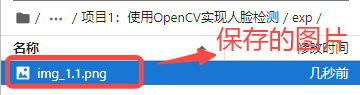

<details>
<summary><font color=red size=3>点击查看动手练习6答案</font></summary>
<pre><code>

```python
cv2.imwrite('图像保存.png', frame)
```
</code></pre>
</details>

### 2.9 释放资源

- `cap.release()`：停止捕获视频，用`cv2.VideoCapture(0)`创建对象，操作结束后要用`cap.release()`来释放资源，否则会占用摄像头导致摄像头无法被其他程序使用。

- `cv2.destroyAllWindows()`：用来删除所有窗口

In [ ]:
# 释放VideoCapture
cap.release()
# 销毁所有的窗口
cv2.destroyAllWindows()

### <font color=red>动手实验</font>

按照以下要求完成实验：
1. 在`<1>`处，实例化一个`VideoCapture`对象赋值给`cap`，设置休息时间为2秒
2. 在`<2>`处，使用`cap.set`设置显示画面像素，宽度为`1280`，高度为`800`
3. 在`<3>`处，使用`cv2.namedWindow`创建显示窗口命名为`image_win`,属性设置为`可调整大小`，`保持图像比例`
4. 在`<4>`处，使用`cap.read()`读取图像将返回值赋值给`ret`和`frame`
5. 在`<5>`处，使用`cv2.imshow`在窗口`image_win`中显示图像`frame`，设置`cv2.waitKey()`为200毫秒
6. 在`<6>`处，使用`cv2.imwrite`保存`frame`图像，命名为`图像保存2.png`
7. 在`<7>`处，使用`cap.release()`和`cv2.destroyAllWindows()`资源释放


**完成实验后，在当前路径下能够查看到命名为`图像保存2.png`的图像，则表示实验完成。**

In [ ]:
import time
# 完成代码
# 打开摄像头
<1>
print(cap.isOpened())

#设置画面像素
<2>


#构建视频的窗口
<3>


#读取摄像头图像
<4>


#更新窗口“image_win”中的图片
<5>
#等待按键事件发生 等待5000ms
<5>

#保存图片
<6>


#释放VideoCapture
<7>
#销毁所有的窗口
<7>

<details>
<summary><font color=red size=3>点击查看答案</font></summary>
<pre><code>

```python
import cv2
import time
# 打开摄像头
cap = cv2.VideoCapture(0)  
time.sleep(2)
print(cap.isOpened())

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 800)

#构建视频的窗口
cv2.namedWindow('image_win',flags=cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO )
cv2.setWindowProperty('image_win', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN) # 全屏展示

#读取摄像头图像
ret, frame = cap.read()

#更新窗口“image_win”中的图片
cv2.imshow('image_win',frame)
#等待按键事件发生 等待5000ms
cv2.waitKey(5000)

#保存图片
cv2.imwrite("./exp/img_1.2.png", frame)

#释放VideoCapture
cap.release()
#销毁所有的窗口
cv2.destroyAllWindows()
```
</code></pre>
</details>

**查看图片方法一**

可以通过输入命令`!ls`来查看当前路径是否有刚刚保存的图片

In [ ]:
!ls ./exp/*.png

## 任务小结

本次实验的收获：

- 使用cv2完成图像采集
- 使用cv2完成图像显示
- 使用cv2完成图像保存